In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Énoncé
Voicilamaison.fr est une application qui révolutionne le tourisme, elle propose à des résidents de temporairement recevoir des invités pour leurs faire partager les habitudes locales. Votre cabinet de consultant vient justement de décrocher un contrat avec cette startup, qui a besoin de votre aide pour identifier les quartiers de Paris les plus prometteurs et aussi pour déterminer si certains critères sont importants afin de construire une offre de location pertinente.

## Mission
Pour donner des pistes à votre client, nous avons collecté des informations disponibles sur une application concurrente qui est présente sur le marché parisien depuis plusieurs années. Bien que vous n'ayez pas une offre commerciale tout à fait similaire, c'est un bon point de départ pour comprendre les habitudes des touristes de la région, à vous de jouer !

<img src='./oc_logo.png' width=15px /> Chargez le fichier `location_logements.csv` à l'aide de Pandas. Stockez le résultat du chargement dans la variable `loc_df`.

Les colonnes du fichier sont uniquement séparées par des virgules.

In [63]:
loc_df = pd.read_csv('location_logements.csv')

# Exercice
## Partie 1 - Inspection des données et nettoyage (10 minutes)

<img src='./oc_logo.png' width=15px /> Afficher les 5 premières lignes du dataframe `loc_df`.

In [64]:
loc_df.head()

,type_propriete,quartier,arrondissement,capacite_accueil,salle_de_bain,chambres,lits,prix,nb_commentaires,note_moyenne,nb_mois_en_activite
0,Complète,Observatoire,75014,2,1.0,NaN,1.0,60.0,9,100.0,34.0
1,Complète,Hôtel-de-Ville,75004,4,1.0,2.0,2.0,90.0,272,94.0,119.0
2,Complète,Opéra,75009,2,1.0,1.0,1.0,130.0,6,96.0,64.0
3,Complète,Popincourt,75011,2,1.0,1.0,1.0,75.0,26,98.0,91.0
4,Chambre privée,Entrepôt,75010,6,1.0,1.0,3.0,170.0,149,92.0,66.0


<img src='./oc_logo.png' width=15px /> Quelle est la taille du dataframe ?

In [65]:
loc_df.shape

(41438, 11)

<img src='./oc_logo.png' width=15px /> Calculez les statistiques élémentaires (min, max, moyenne, écart type, etc) pour toutes les variables quantitatives.

In [66]:
loc_df.describe()

,arrondissement,capacite_accueil,salle_de_bain,chambres,lits,prix,nb_commentaires,note_moyenne,nb_mois_en_activite
count,41438.000000,41438.000000,41438.000000,33214.000000,41293.000000,41438.000000,41438.000000,32413.000000,33167.000000
mean,75012.288962,3.096843,1.121531,1.387246,1.691183,108.505309,20.549471,93.605004,20.788977
std,5.515351,1.609637,0.374932,0.714914,1.103502,171.468815,42.118658,8.079865,22.775596
min,75001.000000,1.000000,0.000000,1.000000,0.000000,8.000000,0.000000,20.000000,0.000000
25%,75009.000000,2.000000,1.000000,1.000000,1.000000,59.000000,1.000000,91.000000,2.000000
50%,75012.000000,2.000000,1.000000,1.000000,1.000000,80.000000,6.000000,96.000000,13.000000
75%,75017.000000,4.000000,1.000000,2.000000,2.000000,118.000000,21.000000,100.000000,32.000000
max,75020.000000,16.000000,6.000000,9.000000,16.000000,9280.000000,796.000000,100.000000,134.000000


<img src='./oc_logo.png' width=15px /> Calculez le taux moyen de valeurs manquantes pour chacune des variables.

In [67]:
loc_df.isna().mean()

type_propriete         0.000000
quartier               0.000000
arrondissement         0.000000
capacite_accueil       0.000000
salle_de_bain          0.000000
chambres               0.198465
lits                   0.003499
prix                   0.000000
nb_commentaires        0.000000
note_moyenne           0.217795
nb_mois_en_activite    0.199599
dtype: float64

<img src='./oc_logo.png' width=15px /> Changez le type de la variable `arrondissement` en object.

In [110]:
loc_df['arrondissement'] = loc_df['arrondissement'].astype(object)

<img src='./oc_logo.png' width=15px /> Remplacez les valeurs manquantes de la colonne `lits` par la valeur 1 (il y a normalement au moins un lit dans le bien loué).

In [68]:
loc_df.loc[loc_df['lits'].isna(), 'lits'] = 1

<img src='./oc_logo.png' width=15px /> Remplacez les valeurs manquantes de la colonne `chambres` par la valeur médiane.

In [69]:
loc_df.loc[loc_df['chambres'].isna(), 'chambres'] = loc_df['chambres'].median()

<img src='./oc_logo.png' width=15px /> Vous allez vérifier que les quartiers et les arrondissements sont correctement associés. Pour cela, croisez les variables `quartier` et `arrondissement` dans un même tableau, vous devriez alors constater que toutes les locations d'un quartier sont situées dans un seul et même arrondissement. Indice : fonction `crosstab` de pandas.

In [70]:
pd.crosstab(loc_df['quartier'], loc_df['arrondissement'])

arrondissement,75001,75002,75003,75004,75005,75006,75007,75008,75009,75010,75011,75012,75013,75014,75015,75016,75017,75018,75019,75020
quartier,,,,,,,,,,,,,,,,,,,,
Batignolles-Monceau,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2559,0,0,0
Bourse,0,1418,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Buttes-Chaumont,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2600,0
Buttes-Montmartre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5029,0,0
Entrepôt,0,0,0,0,0,0,0,0,0,3171,0,0,0,0,0,0,0,0,0,0
Gobelins,0,0,0,0,0,0,0,0,0,0,0,0,1409,0,0,0,0,0,0,0
Hôtel-de-Ville,0,0,0,1342,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Louvre,833,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Luxembourg,0,0,0,0,0,1043,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Partie 2 - Analyse des données (2 heures)
Pour les besoins de visualisation, **nous utiliserons exclusivement la librairie Seaborn** dans le cadre de cet exercice.

### Introduction (15 minutes)

<img src='./oc_logo.png' width=15px /> À l'aide d'un barplot, visualisez la répartition des types de propriétés.

Est-ce que le résultat est surprenant ?

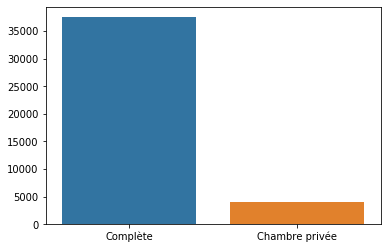

In [10]:
comptage_type_propriete = loc_df['type_propriete'].value_counts()
sns.barplot(x=comptage_type_propriete.index, y=comptage_type_propriete.values);

<img src='./oc_logo.png' width=15px /> À l'aide d'un histogramme faites ressortir la distribution des prix en fonction du type de propriété. Attention à configurer le nombre de `bins` et l'échelle log.

Est-ce que le résultat est surprenant ?

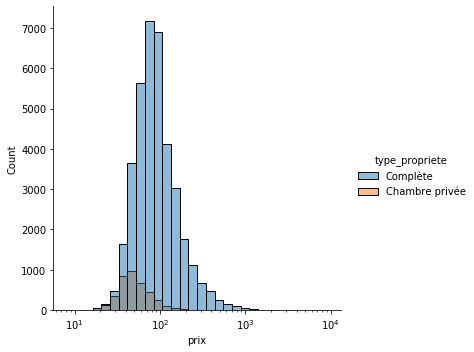

In [11]:
sns.displot(loc_df, x="prix", hue="type_propriete", log_scale=True, bins=30);

<img src='./oc_logo.png' width=15px /> À l'aide d'un barplot, visualisez la répartition des locations par quartier. N'oubliez pas de trier les barres par ordre de grandeur afin d'améliorer l'interprétatibilité.

Quels sont les quartiers ayant le plus d'offres de location ?

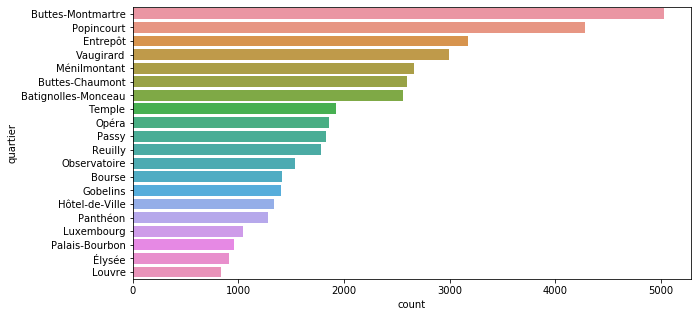

In [12]:
plt.figure(figsize=(10, 5))
quartier_order = loc_df['quartier'].value_counts().index
sns.countplot(y="quartier", order=quartier_order, data=loc_df);

<img src='./oc_logo.png' width=15px /> On souhaite maintenant savoir quels sont les quartiers historiques de la plateforme. Donnez la valeur médiane de la variable `nb_mois_en_activite` en fonction du quartier.

Quels sont les quartiers ayant le plus d'ancienneté sur la plateforme ?

In [13]:
loc_df.groupby('quartier')['nb_mois_en_activite'].median().sort_values()

quartier
Batignolles-Monceau    10.0
Buttes-Chaumont        10.0
Gobelins               10.0
Buttes-Montmartre      11.0
Vaugirard              11.0
Reuilly                12.0
Popincourt             12.0
Passy                  12.0
Ménilmontant           12.0
Observatoire           13.0
Opéra                  14.0
Entrepôt               14.0
Palais-Bourbon         15.0
Élysée                 15.0
Panthéon               16.0
Bourse                 16.0
Louvre                 18.0
Temple                 18.0
Luxembourg             18.0
Hôtel-de-Ville         19.0
Name: nb_mois_en_activite, dtype: float64

### Recherche des facteurs d'influence sur le prix de la location (1 heure)
<img src='./oc_logo.png' width=15px /> On aimerait maintenant savoir si les quartiers où l'offre est la plus importante, sont aussi ceux les plus appréciés dans les notes des locataires. 

Pour cela, il faudra dans un premier temps discrétiser le variable `note_moyenne` en 4 sous-groupes de même tailles, afin de faciliter l'analyse. Stockez les sous-catégories dans la nouvelle variable `categories_note`. Indice fonction `qcut` de pandas.

In [75]:
loc_df['categories_note'] = pd.qcut(loc_df['note_moyenne'], 5, duplicates='drop')

<img src='./oc_logo.png' width=15px /> De la même manière, discrétisez la variable `prix` en 5 sous-groupes. Stockez les sous-catégories dans la nouvelle variable `categories_prix`.

In [76]:
loc_df['categories_prix'] = pd.qcut(loc_df['prix'], 5)

<img src='./oc_logo.png' width=15px /> À l'aide d'un tableau croisé des variables `categories_note` et `categories_prix`, vérifiez si il existe une influence du prix sur la note.

Est-ce qu'une tendance particulière se dégage ?

In [16]:
pd.crosstab(loc_df['categories_note'], loc_df['categories_prix'])

categories_prix,"(7.999, 52.0]","(52.0, 70.0]","(70.0, 90.0]","(90.0, 130.0]","(130.0, 9280.0]"
categories_note,,,,,
"(19.999, 90.0]",2112,1932,1379,1298,1177
"(90.0, 94.0]",1194,1391,1161,1081,984
"(94.0, 97.0]",1138,1401,1364,1353,1352
"(97.0, 100.0]",2112,2489,2313,2628,2554


<img src='./oc_logo.png' width=15px /> Approfondissez la question précédente avec un graphique `displot`, visualisez la distribution des prix en fonction des catégories de notes. N'oubliez pas l'échelle log pour améliorer la lisiblité.

Une confirmation d'observation par rapport au point précédent ?

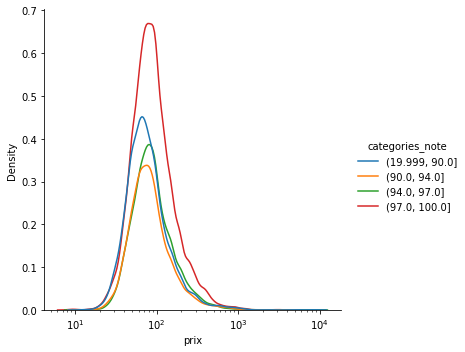

In [17]:
sns.displot(data=loc_df, x="prix", hue="categories_note", kind="kde", log_scale=True);

<img src='./oc_logo.png' width=15px /> Faites de même pour la variable `lits` en décomposant en fonction des sous-groupes de prix.

Existe-t-il une influence du nombre de lits sur le prix ?

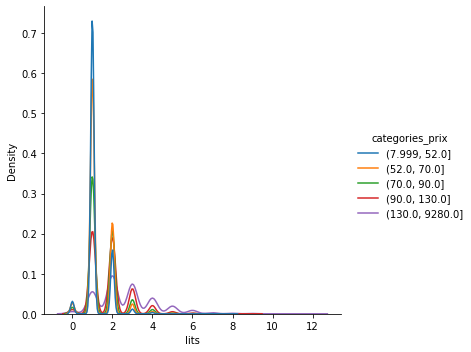

In [96]:
sns.displot(data=loc_df, x="lits", hue="categories_prix", kind="kde", log_scale=False);

<img src='./oc_logo.png' width=15px /> Faites de même pour la variable `nb_mois_en_activite`.

L'ancienneté de la location influence-t-elle le prix ?

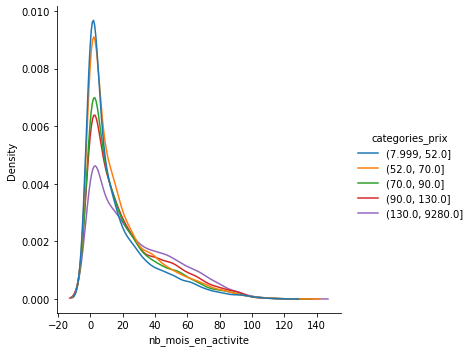

In [97]:
sns.displot(data=loc_df,
            x="nb_mois_en_activite",
            hue="categories_prix",
            kind="kde",
            log_scale=False);

<img src='./oc_logo.png' width=15px /> Visualisez maintenant la répartition des sous-catégories de notes en fonction du quartier (fonction `countplot` dans seaborn). Attention à bien trier les quartiers par ordre de grandeur en fonction du nombre de locations les mieux notées.

La visualisation apporte-t-elle des informations claires ?

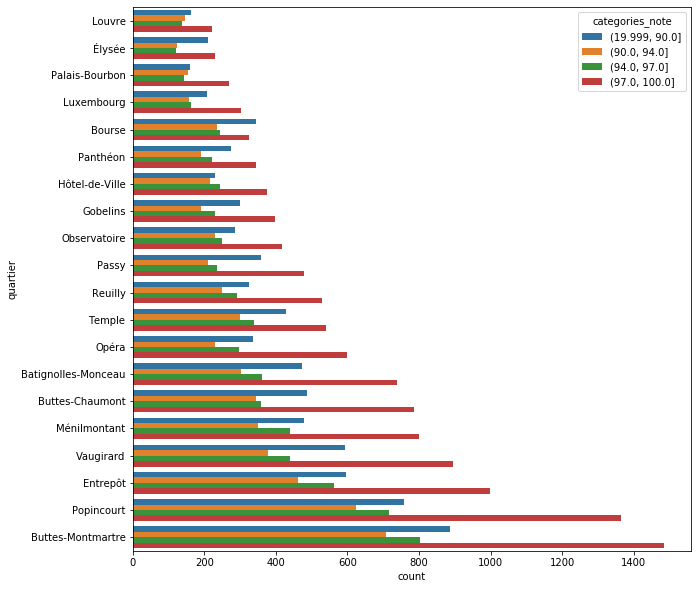

In [20]:
plt.figure(figsize=(10, 10))
filtre_meilleur_notes = loc_df['categories_note'] == loc_df['categories_note'].cat.categories[-1]
ordre_quartier = loc_df[filtre_meilleur_notes].groupby('quartier')['categories_note'].count().sort_values().index
sns.countplot(y="quartier", hue="categories_note", data=loc_df, order=ordre_quartier);

<img src='./oc_logo.png' width=15px /> Le graphique précédent est en réalité trompeur car il est fortement influencé par la quantité de locations dans le quartier. Si l'on veut étudier la qualité des locations d'un quartier, il faudrait plutôt mesurer la tendance moyenne, pour détecter si la variabilité des notes est réduite (variance intra-groupe).

Pour visualiser cela, affichez la distribution des notes par quartier à l'aide d'un grouped boxplot. Attention à ne pas afficher les outliers (paramètre `showfliers`). Triez les boxplots en fonction de la valeur médiane.

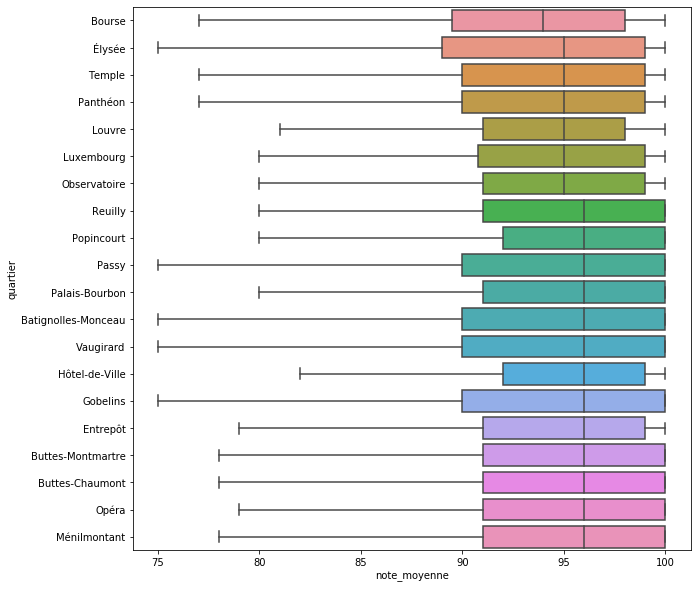

In [21]:
ordre_quartier = loc_df.groupby('quartier')['note_moyenne'].median().sort_values().index

plt.figure(figsize=(10,10))
sns.boxplot(x="note_moyenne", 
            y="quartier", 
            showfliers=False,
            orient='h', 
            order=ordre_quartier, 
            data=loc_df);

<img src='./oc_logo.png' width=15px /> On souhaite maintenant comprendre l'influence du quartier sur le prix de la location. À l'aide d'un grouped boxplot, visualisez la distribution des prix des locations en fonction du quartier. 

Attention à ne pas afficher les outliers (paramètre `showfliers`). Triez les boxplots en fonction de la valeur médiane.

Quels sont les quartiers les plus chères ?

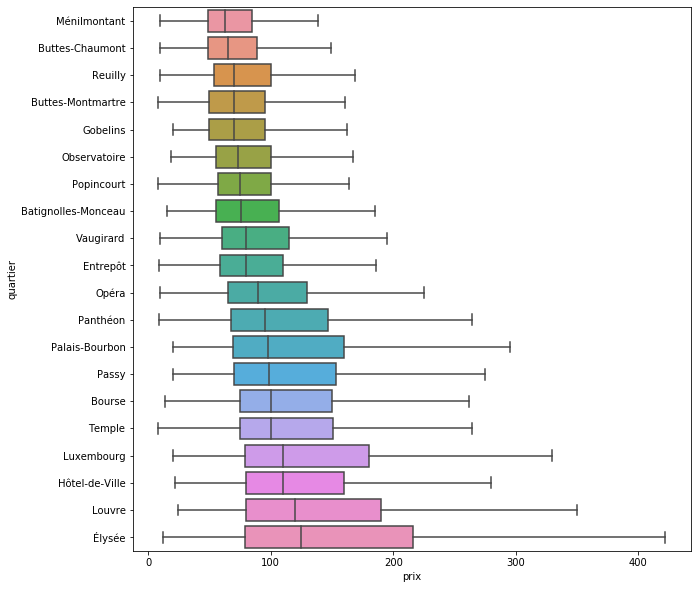

In [22]:
ordre_quartier = loc_df.groupby('quartier')['prix'].median().sort_values().index

plt.figure(figsize=(10,10))
sns.boxplot(x="prix",
            y="quartier", 
            showfliers=False, 
            orient='h', 
            order=ordre_quartier, 
            data=loc_df);

<img src='./oc_logo.png' width=15px /> Bien que le graphique précédent soit assez éloquent, il ne faut pas oublier que le boxplot calcule les valeurs extrêmes en se reposant sur l'hypothèse de normalité de la distribution (ce n'est pas toujours le cas). Alors, rien de mieux qu'un histogramme pour comprendre la distribution d'une variable, problème cependant, il est parfois compliqué de comparer plusieurs histogrammes. 

En suivant le tutoriel https://seaborn.pydata.org/examples/kde_ridgeplot.html on vous propose ici une démonstration que c'est faisable. Le rendu est impressionnant !

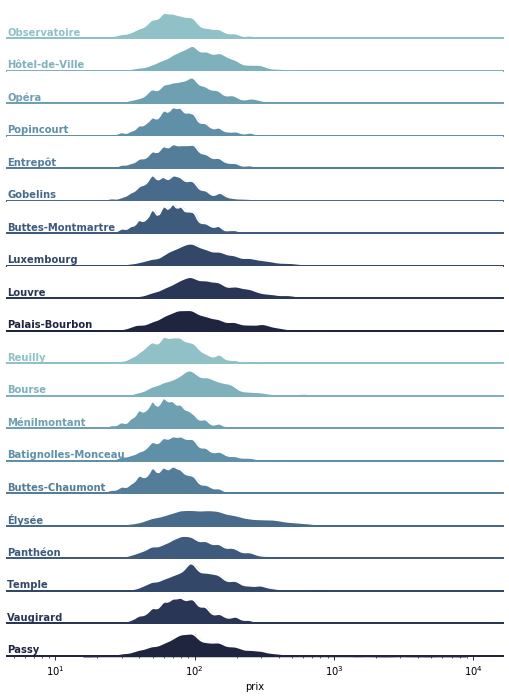

In [23]:
# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(loc_df, row="quartier", hue="quartier", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "prix",
      bw_adjust=.5, clip_on=False, log_scale=True,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "prix", clip_on=False, color="w", lw=2, bw_adjust=.5)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "prix")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=.02)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True);

### Analyse des corrélations linéaires (10 minutes)
<img src='./oc_logo.png' width=15px /> Réaliser une analyse de la corrélation linéaire entre les variables quantitatives. Visualisez cela à l'aide d'une heatmap. 

Le cours pour vous aider https://openclassrooms.com/fr/courses/4525266-decrivez-et-nettoyez-votre-jeu-de-donnees/4725621-recherchez-les-correlations


Quelles sont vos conclusions suite à la visualisation ?

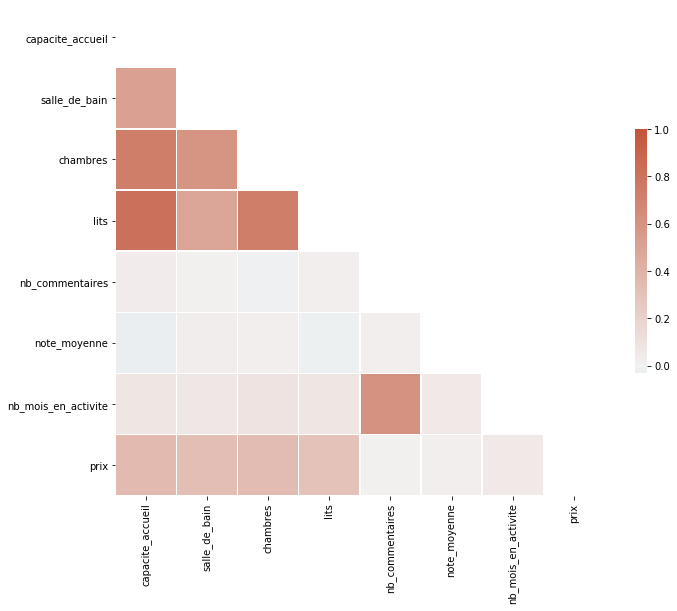

In [24]:
# Compute the correlation matrix
corr = loc_df[['capacite_accueil', 'salle_de_bain', 'chambres',
               'lits', 'nb_commentaires', 'note_moyenne',
               'nb_mois_en_activite', 'prix']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

### Analyse en Composantes Principales (35 minutes)

Avant de vous lancer sur cette partie, il est nécessaire que vous soyez familié avec l'ACP, si ce n'est pas le cas suivez ce cours https://openclassrooms.com/fr/courses/4525281-realisez-une-analyse-exploratoire-de-donnees/5280368-comprenez-lenjeu-de-lanalyse-en-composantes-principales.

Pour les visualisations vous pourrez vous appuyer sur le TP suivant https://openclassrooms.com/fr/courses/4525281-realisez-une-analyse-exploratoire-de-donnees/5345201-tp-realisez-une-acp

<img src='./oc_logo.png' width=15px /> L'ACP est sensible à la présence de valeurs extrêmes, pour simplifier l'analyse, supprimer les 200 locations ayant les loyers les plus élevés. *C'est d'autant plus logique car nous souhaitons trouver une nouvelle façon de synthétiser les caractéristiques communes à la majorité des données, des valeurs extrêmes véhiculent à l'inverse des caractéristiques inhabituelles.*

In [79]:
loc_df = loc_df.sort_values('prix').iloc[:-200, :]

<img src='./oc_logo.png' width=15px /> Extrayez les variables `nb_mois_en_activite`, `note_moyenne`, `capacite_accueil` et `prix`. Puis standardisez ces variables avec `StandardScaler` de sklearn.

In [80]:
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from functions import *

acp_vars = ['nb_mois_en_activite', 'note_moyenne', 'capacite_accueil', 'prix']
X = loc_df[acp_vars].dropna()
keep_ind = X.index
X = StandardScaler().fit_transform(X)

<img src='./oc_logo.png' width=15px /> Effectuez une ACP et affichez l'éboulis des valeurs propres.

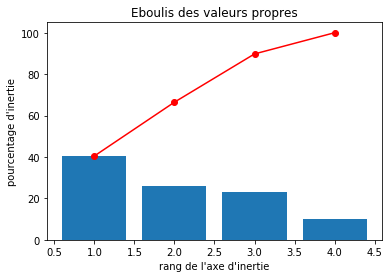

In [85]:
pca = decomposition.PCA(n_components=len(acp_vars))
pca.fit(X)
X = pca.transform(X)

display_scree_plot(pca)

<img src='./oc_logo.png' width=15px /> Affichez le cercle des corrélations des deux premières composantes.

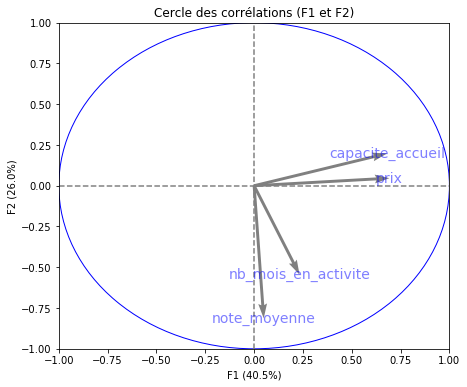

In [82]:
pcs = pca.components_
display_circles(pcs, 3, pca, [(0,1),(2,3),(4,5)], labels = np.array(acp_vars))

<img src='./oc_logo.png' width=15px /> Projetez les points sur les deux premières composantes, puis isolez les valeurs par quartier et colorez par catégories de prix. Indice : utilisez `relplot` de Seaborn.

In [83]:
acp_df = pd.DataFrame(X)
acp_df['categories_prix'] = loc_df.loc[keep_ind, 'categories_prix']
acp_df['categories_note'] = loc_df.loc[keep_ind, 'categories_note']
acp_df['quartier'] = loc_df.loc[keep_ind, 'quartier']

<Figure size 504x504 with 0 Axes>

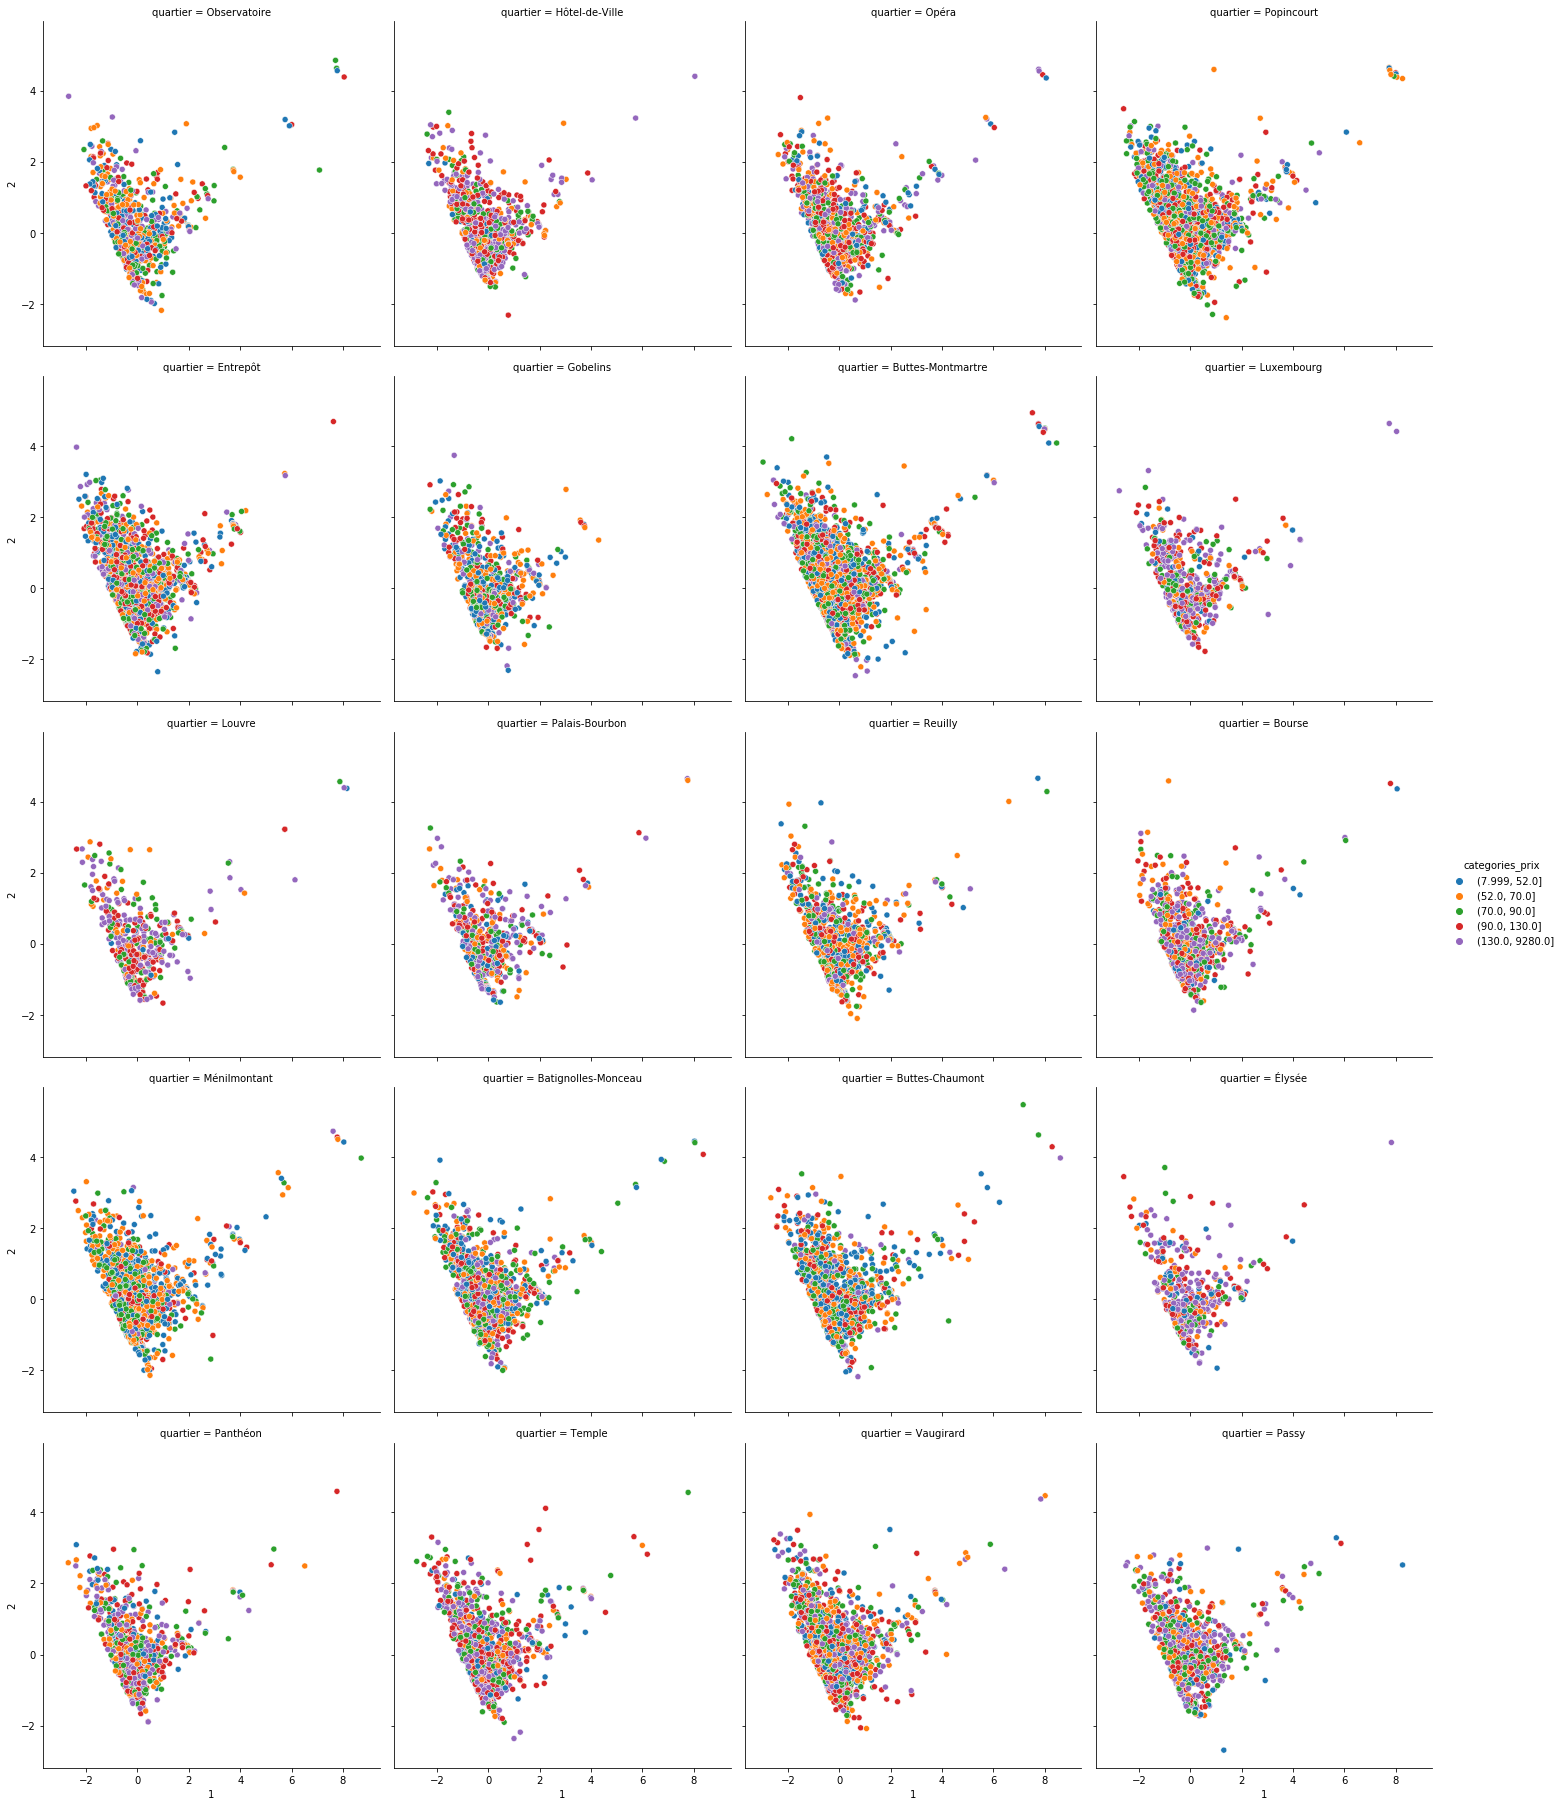

In [89]:
plt.figure(figsize=(7, 7))
sns.relplot(data=acp_df, x=1, y=2, col='quartier', col_wrap=4, hue='categories_prix');

## Bonus - Qualité de vie de l'arrondissement (15 minutes)

Après avoir présenté une première analyse avec votre client, ce dernier vous partage que ses utilisateurs sont très sensibles à la qualité de vie du quartier (en particulier la propreté), vous lui proposez d'enrichir votre travail en utilisant des données en accès ouvert. Lien https://opendata.paris.fr/explore/dataset/dans-ma-rue/table/?disjunctive.type&disjunctive.soustype&disjunctive.code_postal&disjunctive.arrondissement&disjunctive.conseilquartier&disjunctive.prefixe&disjunctive.intervenant&sort=-datedecl

<img src='./oc_logo.png' width=15px /> Importez le fichier `qualite_de_vie.csv`, affichez les premières lignes pour en comprendre la structure.

In [127]:
qualite_df = pd.read_csv('qualite_de_vie.csv')
qualite_df.head()

,TYPE DECLARATION,CODE POSTAL
0,Objets abandonnés,75019
1,"Autos, motos, vélos...",75018
2,Propreté,75013
3,"Graffitis, tags, affiches et autocollants",75014
4,Objets abandonnés,75017


<img src='./oc_logo.png' width=15px /> Établissez quels sont les arrondissements les moins bien classés en comptant le nombre de déclarations.

In [102]:
qualite_order = qualite_df.groupby('CODE POSTAL')['TYPE DECLARATION'].count().sort_values()
qualite_order

CODE POSTAL
75001     2206
75006     2840
75002     2925
75007     3262
75004     3562
75003     4070
75008     4440
75005     5095
75014     6783
75009     6925
75016     8340
75013     9878
75017    11462
75012    12262
75011    13810
75010    14446
75019    14564
75015    16965
75020    17758
75018    19816
Name: TYPE DECLARATION, dtype: int64

<img src='./oc_logo.png' width=15px /> Supprimez les 5 plus mauvais arrondissements (du point de vue de la qualité de vie) et retournez le classement des quartiers ayant le plus d'offres.

In [125]:
filtre_qualite = loc_df['arrondissement'].isin(qualite_order[:-5].index)
loc_df[filtre_qualite].groupby('quartier')['arrondissement'].count().sort_values()

quartier
Louvre                  824
Élysée                  881
Palais-Bourbon          956
Luxembourg             1033
Panthéon               1276
Hôtel-de-Ville         1334
Bourse                 1394
Gobelins               1408
Observatoire           1537
Reuilly                1778
Passy                  1800
Opéra                  1860
Temple                 1909
Batignolles-Monceau    2554
Popincourt             4275
Name: arrondissement, dtype: int64

## Fin
<img src='./oc_logo.png' width=15px /> Conclusions

Quelles sont vos recommandations suite à ces analyses :
- Sur le nombre optimal de chambres/lit/salle de bain ?
- La fourchette de prix optimale ?
- Quels sont les arrondissements ayant le plus de potentiel ?

<img src='./oc_logo.png' width=15px /> Perspectives d'amélioration

On aurait pu exploiter des nouvelles sources d'informations publiques :
- https://opendata.paris.fr/explore/dataset/dans-ma-rue/table/?disjunctive.type&disjunctive.soustype&disjunctive.code_postal&disjunctive.arrondissement&disjunctive.conseilquartier&disjunctive.prefixe&disjunctive.intervenant&sort=-datedecl
- https://opendata.paris.fr/explore/dataset/chantiers-a-paris/table/?disjunctive.cp_arrondissement&disjunctive.chantier_categorie&disjunctive.moa_principal&disjunctive.chantier_synthese&disjunctive.localisation_detail&disjunctive.localisation_stationnement
- https://opendata.paris.fr/explore/dataset/espaces_verts/table/?disjunctive.type_ev&disjunctive.categorie&disjunctive.adresse_codepostal&disjunctive.presence_cloture
- https://opendata.paris.fr/explore/dataset/marches-decouverts/table/?disjunctive.produit&disjunctive.ardt&disjunctive.jours_tenue&disjunctive.gestionnaire

Ou encore faire une carte interactive avec Folium http://python-visualization.github.io/folium/